# Tarea Examen 2: Física Computacional

*Nombre: Sanvicente Méndez Ana Belen*

Resuelva los siguientes ejercicios, explicando claramente su razonamiento.



## 1. 
Realice un notebook en el se programen y expliquen los siguientes algoritmos de integración de ecuaciones diferenciales:

(a) Integración con método de Euler.

(b) Integración sobre serie de Taylor a 2do orden.

(c) Integración con método de Runge-Kutta de 2do orden.

(d) Integración con método de Runge-Kutta de 4do orden.


In [ ]:
from pylab import *
from scipy.integrate import *

In [ ]:
def osc_arm_2d(t,x):
  # x == (x,y,vx,vy)
  dx = x[2]
  dy = x[3]
  u = x[2]**2 + x[3]**2
  if u**(1/2) <= 1:
    dvx = -x[0]-0.1*x[2]
    dvy = -x[1]-0.1*x[3]
  else:
    dvx =  -x[0]-0.2*u**(1/2)*x[2]
    dvy =  -x[1]-0.2*u**(1/2)*x[3]

  return array([ dx , dy , dvx , dvy ])



  tf= 30*pi
n=1
for i in range(12):
  n = i
  solucion = RK4(osc_arm_2d, [0,tf], [0,1, 2*cos(n*pi/6),2*sin(n*pi/6)])
  plot(solucion[0],solucion[1][0], label=r'$n$=%2.f' %(n))
legend()
show()


 def MomentoAngular(x,y,vx,vy):
    momento=[]
    for i in range(0,len(x)):
        momento.append((x[i]*vy[i]-y[i]*vx[i]))
    return momento


for i in range(12): #REVISar, no debe de dar 0 cuando n=0
    sol=RK4(osc_arm_2d, [0,tf], [0,1, 2*cos(i*pi/6),2*sin(i*pi/6)])
    momento=MomentoAngular(sol[1][0],sol[1][1],sol[1][2],sol[1][3])
    plot(solucion[0],momento, label =r'$n$=%2.f' %(i))

legend()
show()


solucion = RK4(osc_arm_2d, [0,tf], [1,2, 2*sin(0),2*cos(0)])
plot(solucion[1][0],solucion[1][1])








# Inciso (a) Integración con método de Euler
def Met_Euler(cond_ini , t , ec_dif , args=[] ):
    N,M,h = len(t),len(cond_ini),t[1]-t[0]
    solucion = zeros((N,M))
    solucion[0] = array(cond_ini)
    for i in range(N-1):
        if len(args) == 0: 
            solucion[i+1] = solucion[i] + h*ec_dif( t[i] , solucion[i] )
        else:
            solucion[i+1] = solucion[i] + h*ec_dif( t[i] ,  solucion[i], args )
    return solucion

# Inciso (b) Integración sobre serie de Taylor de segundo orden
def ode_exp(f ,t_intervalo ,y0 ,jac, delta=0.01):
  t = arange(t_intervalo[0], t_intervalo[1]+delta, delta)
  sol = zeros((len(y0),len(t)))
  sol[:,0] = y0
  for i in range(len(t)-1):
    sol[:,i+1] = sol[:,i] + delta*f(t[i],sol[:,i]) + 0.5*(delta**2)*dot(jac(t[i],sol[:,i]),f(t[i],sol[:,i]))
  return (t,sol)
def jac(t,x): # Jacobiano
  # x == (x,v)
  return array([[0,1.0],[-1,0]])

# Inciso (c) Integración con método Runge-kutta de 2do orden
def RK2(f, t_intervalo,y0,delta= 0.01):
  t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
  sol = zeros((len(y0),len(t)))
  sol[:,0] = y0
  for i in range(len(t)-1):
      vec_n = sol[:,i] + 0.5*delta*f(t[i],sol[:,i])
      sol[:,i+1] = sol[:,i] + delta*f(t[i]+0.5*delta,vec_n)
  return (t,sol)

# Inciso (d) Integración con método Runge-kutta de 4to orden
def RK4(f , t_intervalo , y0 , delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        k1 = f( t[i] , sol[:,i] )
        k2 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k1 )
        k3 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k2 )
        k4 = f( t[i] + delta , sol[:,i] + delta*k3 )
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return (t,sol)

def RK4_con_omega(f , t_intervalo , y0 ,omega=1, delta=0.01):
    t = arange(t_intervalo[0],t_intervalo[1]+delta,delta)
    sol = zeros((len(y0),len(t)))
    sol[:,0] = y0
    for i in range(len(t)-1):
        k1 = f( t[i] , sol[:,i],omega )
        k2 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k1,omega )
        k3 = f( t[i] + 0.5*delta , sol[:,i] + 0.5*delta*k2,omega )
        k4 = f( t[i] + delta , sol[:,i] + delta*k3,omega )
        sol[:,i+1] = sol[:,i] + (delta/6)*(k1 + 2*k2 + 2*k3 + k4)
    return (t,sol)
# Función para la Ec. (1)
def ec_1(t,x): 
  # x es (x,dx)
  dx = x[1]
  dvx = -0.5*x[1] - sin(x[0]) + exp(-t)*sin(3*t)
  return array([dx,dvx]) 

# Función para la Ec. 2
def ec_2(t,x):
  dx = x[1]
  dvx = x[2]
  dax = -x[2]**2 + 3*x[1]**3-(cos(x[0]))**2 + (exp(-t) * sin(3*t))
  return array([dx,dvx,dax])

# Función para la ec. (3)
def ec_3(t,x,omega=1):
    # x es (x,dx) 
    dx = x[1]
    dvx = -0.1*x[1] - 4*sin(x[0]) + 0.5*sin(omega*t)
    return array([dx,dvx])

def ec_4(t,x):
  # x es (x,y,z)
  dx = 10*(x[1]-x[0])
  dy = x[0]*(28-x[2])-x[1]
  dz = x[0]*x[1]- (8/3)*x[2]
  return array([dx,dy,dz])

Verifique el funcionamiento de sus integradores encontrando la solución de la siguiente ecuación diferencial para y(t):

ec. (1) $$ \ddot x + 0.5\dot x+sinx = e^{-t}sin3t $$

Con condiciones iniciales $\dot x(0) = 1  $  $ x(0) =0$

In [ ]:
ci = (0,1) # Condición inicial dx(0)=1, x(0)=0

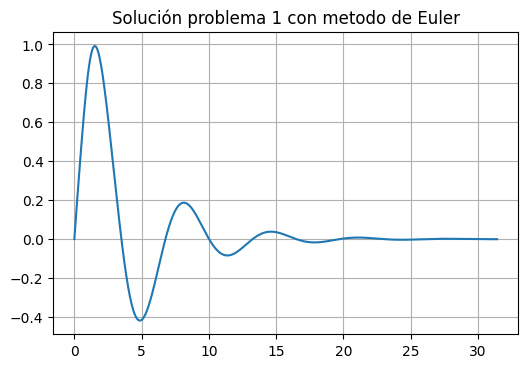

In [ ]:
# solución con Euler
t = linspace(0,10*pi,3143)
sol = Met_Euler( ci, t , ec_1 , args=[] )
# Gráfica
figure(dpi=100)
plot(t,sol[:,0])
title('Solución problema 1 con metodo de Euler')
grid()
show()

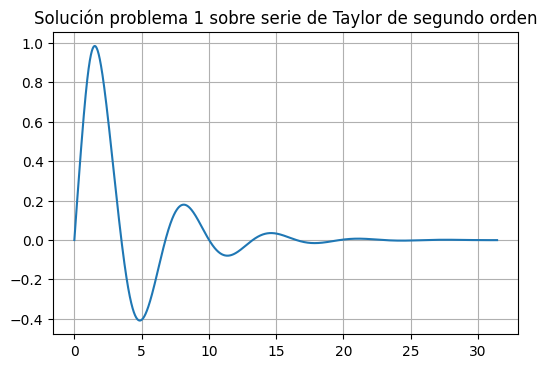

In [ ]:
# solución con serie de taylor 2do orden
solucion_Taylor = ode_exp(ec_1,[0,10*pi],[0,1],jac)
# Gráfica
figure(dpi=100)
plot(solucion_Taylor[0],solucion_Taylor[1][0]) # solucion_Taylor[0] es del tiempo
title('Solución problema 1 sobre serie de Taylor de segundo orden')
grid()
show()


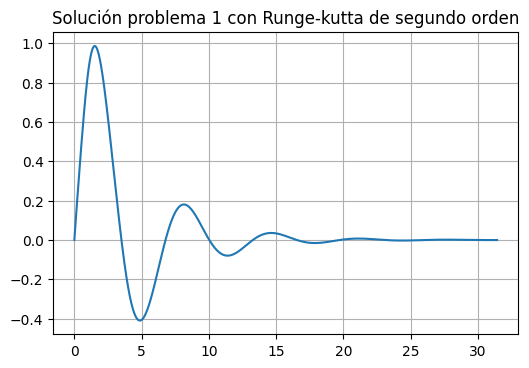

In [ ]:
# solución con runge-kutta 2
solucionRK2 = RK2(ec_1,(0,10*pi),ci)
t = linspace(0,10*pi,3143)
# Gráfica
figure(dpi=100)
plot(t,solucionRK2[1][0])
title('Solución problema 1 con Runge-kutta de segundo orden')
grid()
show()

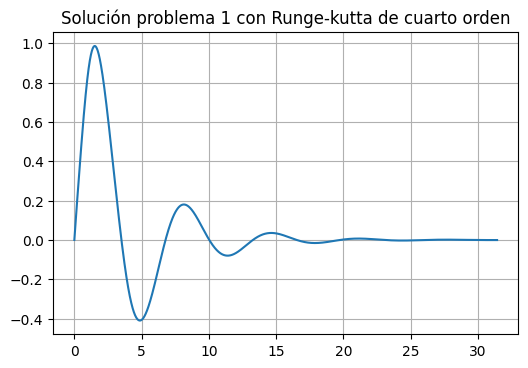

In [ ]:
# Solución con runge-kutta 4
solucion_RK4 = RK4(ec_1,(0,10*pi),ci)
t = linspace(0,10*pi,3143)
# Gráfica
figure(dpi=100)
plot(t,solucion_RK4[1][0])
title('Solución problema 1 con Runge-kutta de cuarto orden')
grid()
show()

## 2. 
Utilizando los integradores anteriores encuentre un paso que le asegure que la solución tenga por lo
menos 4 cifras significativas en el resultado de integración. La ecuación es la siguiente:

ec. (2) $$\dddot y +  \ddot y^2 - 3\dot y^3 + cos²y = e ^ {-t} sin3t $$

Con condiciones iniciales $\ddot y(1) = 1 , \dot y(1) = 2  , y(1) =1 $ En particular que sucede en el intervalo t ∈ [1, 2]
y t ∈ [1, 2.1].


In [ ]:
ci = (1,2,1) # Condición inicial
t = linspace(1,2,101) # Tiempo de 1 a 2
# Este problema se resolvió con tres métodos para compararlos, pero se especificó que solo debía ser con un método

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: overflow encountered in double_scalars


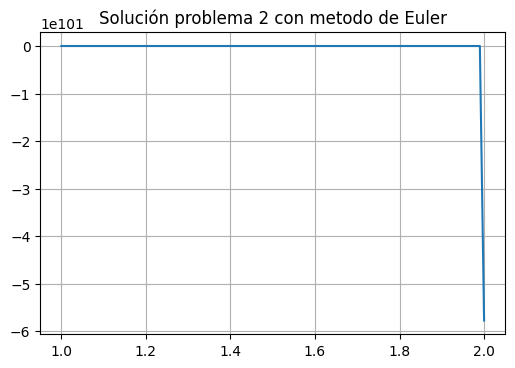

In [ ]:
# solución con método de Euler
sol = Met_Euler( ci, t , ec_2 , args=[] )
# Grafica
figure(dpi=100)
plot(t,sol[:,0])
title('Solución problema 2 con metodo de Euler')
grid()
show() 
# Se observa que marca error al poner el límite que es 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in cos


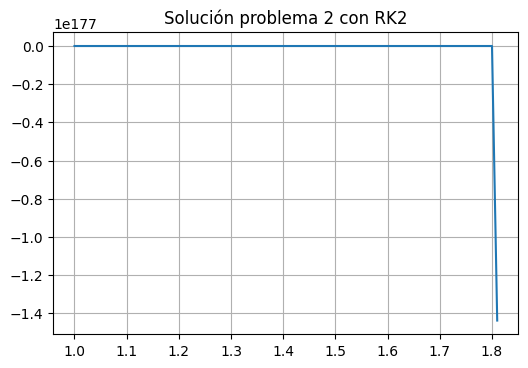

In [ ]:
# Solución con RK2
solucionR2 = RK2(ec_2,(1,2),ci)
figure(dpi=100)
plot(t,solucionR2[1][0])
title('Solución problema 2 con RK2')
grid()
show()
# Se observa que marca error al poner el límite que es 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in cos


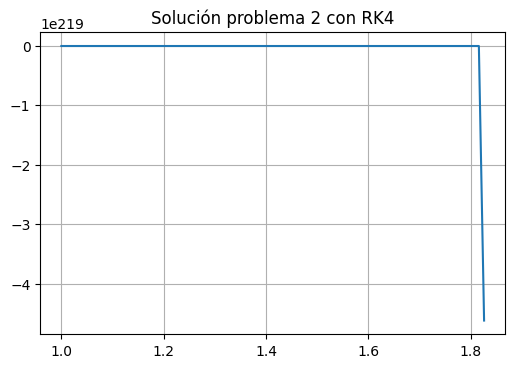

In [ ]:
# Solución con RK4
ci = (1,2,1)
t = linspace(1,2,99)
solucionR = RK4(ec_2,(1,1.98),ci) # Se debe aproximar el valor a 2 poco a poco para mejor precisión
figure(dpi=100)
plot(t,solucionR[1][0])
title('Solución problema 2 con RK4')
grid()
show()

In [ ]:
# Se observa en la gráfica que el valor analítico del límite deberá ser 2, de ahí la producción de una asíntota, la mejor función es RK4 ya que nos da una asíntota con mayor alcance lo que quiere decir que es el mejor de nuestros métodos

## 3. 
Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos
opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parametros
al momento de hacer la integración. Una vez hecho esto, obtenga la solución de la siguiente ecuación
diferencial

ec. (3) $$\ddot x + \frac{1}{10} \dot x + 4sinx = \frac{1}{2}sin(\omega t)$$

Con condiciones iniciales  ̇x(0) = 1 y x(0) = 0 y para ω = {1, 1.1, 1.2, 1.3, ..., 2.9, 3}. Realice la grafica
de algunas soluciones que representen el comportamiento de la solución en función de ω y explique su
resultado.

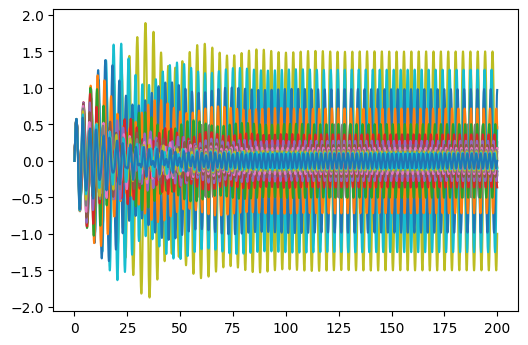

In [ ]:
ci = [0,1]
omegas = arange(1,3.1,0.1) 
t_f = 200
figure(dpi=100)
for i in range(len(omegas)):
  solucion=RK4_con_omega(ec_3, (0,t_f), ci, omegas[i])
  plot(solucion[0],solucion[1][0])

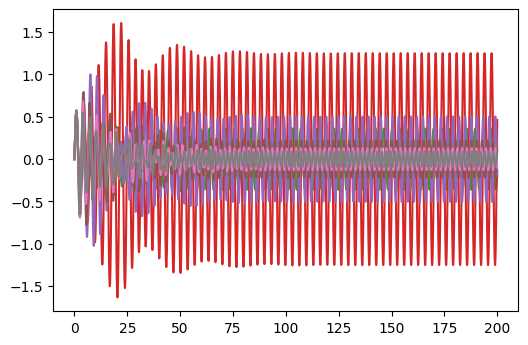

In [ ]:
ci = [0,1]
omegas = arange(1,3.1,0.3) 
t_f = 200
figure(dpi=100)
for i in range(len(omegas)):
  solucion=RK4_con_omega(ec_3, (0,t_f), ci, omegas[i])
  plot(solucion[0],solucion[1][0])

# Se observa cómo las amplitudes de las curvas de resonancia cambian. La amplitud máxima crece conforme se aumenta la omega.

## 4. 
Considere el siguiente sistema de ecuaciones diferenciales:

(4) $$ \frac{dx}{dt} = 10(y-x) $$

(5) $$ \frac{dy}{dt} = x(28-z) - y$$

(6) $$ \frac{dz}{dt} = xy - \frac{8}{3}z$$





Realice una integración numerica del sistema de ecuaciones con alguno de los integradores del problema
1 (el que mas le guste) y realice los siguientes ejercicios:


(a) Elija una condicion inicial aleatoria en el x, y, z ∈ [−5, 5] y realice la grafica de la solucion en el
plano xy, xz y yz y comente sus observaciones.

In [ ]:
# Se eligio a RK4 como metodo para este ejercicio
ci = (1,1,1) # Condición inicial aleatoria
t = (0,30,1000)

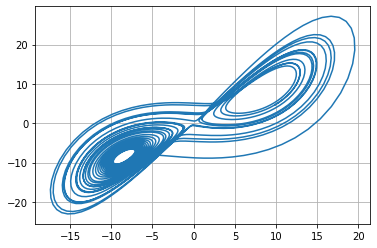

In [ ]:
solucionP4 = RK4(ec_4,(0,30),ci)
plot(solucionP4[1][0],solucionP4[1][1]) # Para graficar en XY
grid()

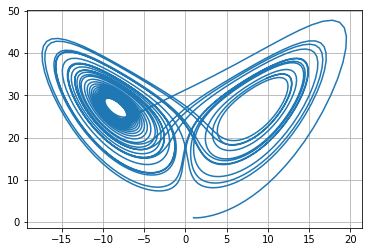

In [ ]:
plot(solucionP4[1][0],solucionP4[1][2]) # Para graficar en XZ
grid()

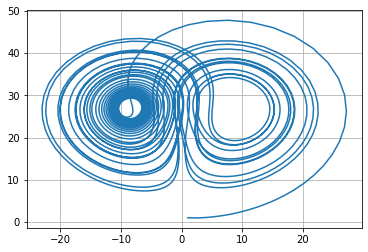

In [ ]:
plot(solucionP4[1][1],solucionP4[1][2]) # Para graficar YZ
grid()

In [ ]:
# Se observan "cortes" en los planos y se puede ver un comportamiento de tipo punto focal a la izquierda al que le llamaremos "punto focal 1" para la explicación en el inciso b y le llamaremos "extensión" a la otra porción que se desprende de las lineas que van al "punto focal 1"

(b) Ahora tome 3 soluciones parecidas. Para ello proponga 3 condiciones iniciales tales que en la
coordenada en y las condiciones iniciales difieran entre si en $10^{−2}$.
Explique lo que observa.
Nota: De preferencia realice integraciones con tiempos relativamente largos en los que pueda
apreciar diferencias en el comportamiento de las soluciones. Ademas asegure que cada una de las
soluciones que encuentre sea convergente, es decir encuentre un paso adecuado para realizar la
integracion.

In [ ]:
""" En los siguientes gráficos se observa un comportamiento en los cortes de los planos, onforme se aumenta la diferencia de 0.01 en 0.01. """

' En los siguientes gráficos se observa un comportamiento en los cortes de los planos, onforme se aumenta la diferencia de 0.01 en 0.01. '

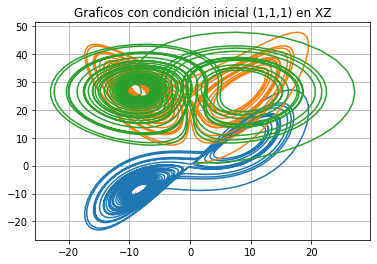

In [ ]:
# Grafica con la condición inicial sin modificaciones
plot(solucionP4[1][0],solucionP4[1][1]) # Para graficar en XY
plot(solucionP4[1][0],solucionP4[1][2]) # Para graficar en XZ
plot(solucionP4[1][1],solucionP4[1][2]) # Para graficar en YZ
title('Graficos con condición inicial (1,1,1) en XZ')
grid()
show()

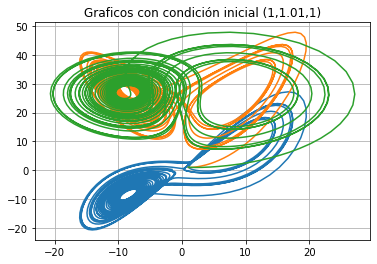

In [ ]:
ci1 = (1,1.01,1) # Condición inicial aleatoria
solucionP41 = RK4(ec_4,(0,30),ci1)
# graficas para oservar el compirtamiento de los planos con la condición inicial 1
plot(solucionP41[1][0],solucionP41[1][1]) # Para graficar en XY
plot(solucionP41[1][0],solucionP41[1][2]) # Para graficar en XZ
plot(solucionP41[1][1],solucionP41[1][2]) # Para graficar en YZ
title('Graficos con condición inicial (1,1.01,1)')
grid()
show()

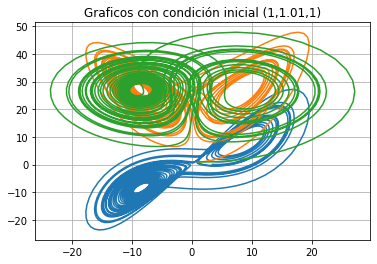

In [ ]:
ci2 = (1,1.02,1) # Condición inicial aleatoria
solucionP42 = RK4(ec_4,(0,30),ci2)
# graficas para oservar el compirtamiento de los planos con la condición inicial 2
plot(solucionP42[1][0],solucionP42[1][1]) # Para graficar en XY
plot(solucionP42[1][0],solucionP42[1][2]) # Para graficar en XZ
plot(solucionP42[1][1],solucionP42[1][2]) # Para graficar en YZ
title('Graficos con condición inicial (1,1.01,1)')
grid()
show()

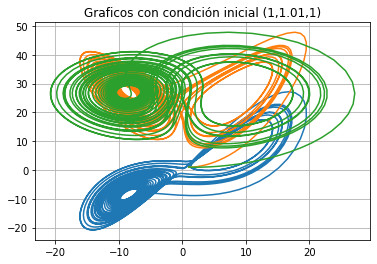

In [ ]:
ci3 = (1,1.03,1) # Condición inicial aleatoria
solucionP43 = RK4(ec_4,(0,30),ci3)
# graficas para oservar el compirtamiento de los planos con la condición inicial 3
plot(solucionP43[1][0],solucionP43[1][1]) # Para graficar en XY
plot(solucionP43[1][0],solucionP43[1][2]) # Para graficar en XZ
plot(solucionP43[1][1],solucionP43[1][2]) # Para graficar en YZ
title('Graficos con condición inicial (1,1.01,1)')
grid()
show()



> Comparación de cada plano





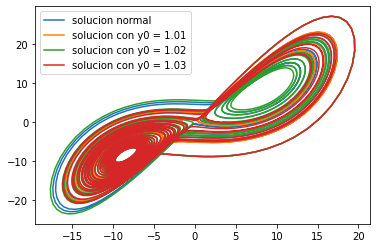

In [ ]:
# Comparación en el plano XY
plot(solucionP4[1][0],solucionP4[1][1], label ='solucion normal') # Para graficar en XZ
plot(solucionP41[1][0],solucionP41[1][1], label = 'solucion con y0 = 1.01') # Para graficar en XZ
plot(solucionP42[1][0],solucionP42[1][1], label = 'solucion con y0 = 1.02') # Para graficar en XZ
plot(solucionP43[1][0],solucionP43[1][1], label = 'solucion con y0 = 1.03') # Para graficar en XZ
legend()
show()

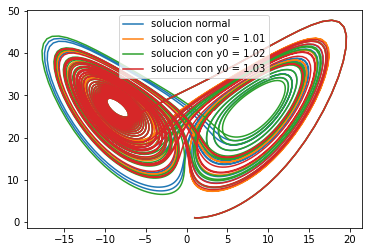

In [ ]:
# Comparación en el plano XZ
plot(solucionP4[1][0],solucionP4[1][2], label ='solucion normal') # Para graficar en XZ la solucion normal
plot(solucionP41[1][0],solucionP41[1][2], label = 'solucion con y0 = 1.01') # Para graficar en XZ la primera solucion con + 0.01 en y
plot(solucionP42[1][0],solucionP42[1][2], label = 'solucion con y0 = 1.02') # Para graficar en XZ la segunda solucion con + 0.02 en y
plot(solucionP43[1][0],solucionP43[1][2], label = 'solucion con y0 = 1.03') # Para graficar en XZ la tercera solucion con + 0.03 en y
legend()
show()

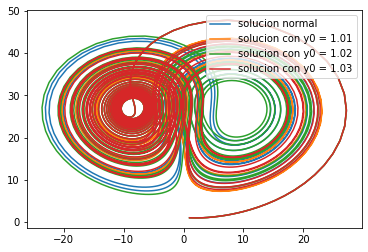

In [ ]:
# Comparación en el plano YZ
plot(solucionP4[1][1],solucionP4[1][2], label ='solucion normal') # Para graficar en YZ la solucion normal
plot(solucionP41[1][1],solucionP41[1][2], label = 'solucion con y0 = 1.01') # Para graficar en YZ la primera solucion con + 0.01 en y
plot(solucionP42[1][1],solucionP42[1][2], label = 'solucion con y0 = 1.02') # Para graficar en YZ la segunda solucion con + 0.02 en y
plot(solucionP43[1][1],solucionP43[1][2], label = 'solucion con y0 = 1.03') # Para graficar en YZ la tercera solucion con + 0.03 en y
legend()
show()

In [ ]:
""" Se observa que en la "extensión" la línea roja que corresponde a la solucion  con el omega con +0.03 se separa más y alrededor del punto focal se unen más las líneas en las gráficas de los planos"""

' Se observa que en la "extensión" la línea roja que corresponde a la solucion  con el omega con +0.03 se separa más y alrededor del punto focal se unen más las líneas en las gráficas de los planos'

## Extra 
Utilice el integrador de SciPy (solve ivp) para obtener una solución con un error de $10^{−8}$ y que además
sea densa para resolver los problemas 3 y 4.

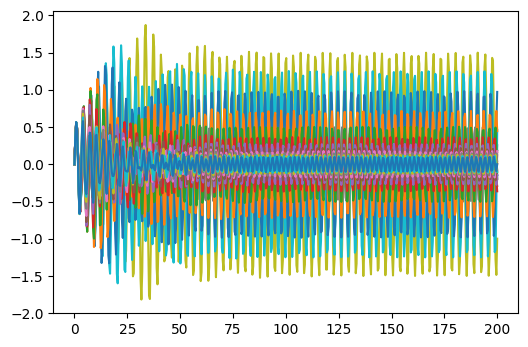

In [ ]:
# Solucion problema 3
ci = [0,1]
omegas = arange(1,3.1,0.1)
t_f = 200
t =  linspace(0,t_f, 500)
figure(dpi=100)
for omega in omegas:
    sol_extra3 = solve_ivp(ec_3,(0,t_f),ci,rtol=1e-8,atol=1e-8,args = (omega,),dense_output = True) # para que sea densa se pone el último argumento y se especifica el error de 1e-8
    plot(t,sol_extra3.sol(t)[0])

show()


In [ ]:
# Solucion problema 4
ci = [2,3,1.5]
sol_extra4 = solve_ivp(ec_4,(0,30),ci,rtol=1e-8,atol=1e-8,dense_output = True) # para que sea densa se pone el último argumento y se especifica el error de 1e-8

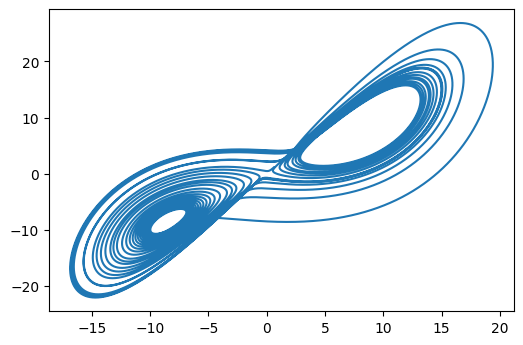

In [ ]:
t = linspace(0,30,111042)
figure(dpi=100)
plot(sol_extra4.sol(t)[0],sol_extra4.sol(t)[1]) # Para YZ

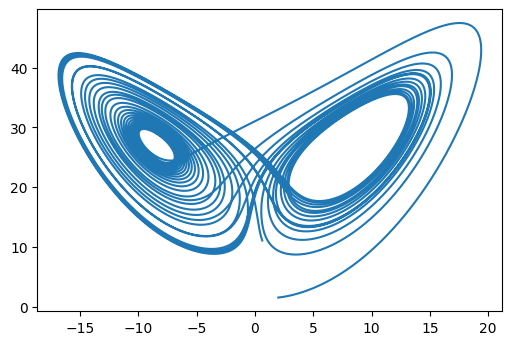

In [ ]:
figure(dpi=100)
plot(sol_extra4.sol(t)[0],sol_extra4.sol(t)[2]) # Para XZ

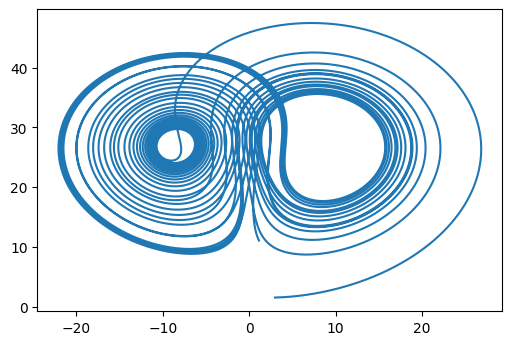

In [ ]:
figure(dpi=100)
plot(sol_extra4.sol(t)[1],sol_extra4.sol(t)[2]) # Para YZ